# _Deep Learning - Artificial Neural Networks / Derin Öğrenme - Yapay Sinir Ağları_

Bugün insan beyninin öğrenme modelini taklit ederek öğrenen yapay sinir ağlarını derinlemesini öğreneceğiz.

#### _Classification_

_Cevabu evet hayır olan sorular = classifition_

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
#pip install tensorflow tensor = çok boyutlu matrix matris

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.columns # tum sutun isimleri gelir.

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##### yontem 1

In [19]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df[['Outcome']]

##### yontem 2

In [24]:
x=df.drop('Outcome', axis=1)  # outcome u sil, diğerleri 1 e eşitle
y=df[['Outcome']]

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### yontem 3

In [28]:
x=df.iloc[:,0:8]  
y=df.iloc[:,8]

# iloc = şurdan başla şuraya git anlamına gelir
# 8 e kadar x e eşitle. 8 den sonrasını y ye eşitle

##### -

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model=Sequential()
model.add(Dense(80, activation='relu')) # hayal urunu, hiçbir dayanak yok 80 olması için
model.add(Dense(120, activation='relu')) # ikinci nöron oluşturuldu
model.add(Dense(80, activation='relu')) # 3. nöron
model.add(Dense(30, activation='relu')) # 4. nöron
model.add(Dense(1, activation='sigmoid')) # 5. nöron. 1 dedim çünkü classificationda son layer ın çıkış olması lazım.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# dense dediğimiz zaman bütün nöronlar birbirine bağlanacak demektir.
# bi layerın çıktısı bi layerın girdisi oluyor

In [34]:
history=model.fit(x,y, batch_size=32, validation_split=0.10, verbose=2, epochs=100)

Epoch 1/100
22/22 - 0s - 5ms/step - accuracy: 0.8148 - loss: 0.3882 - val_accuracy: 0.6753 - val_loss: 0.7406
Epoch 2/100
22/22 - 0s - 4ms/step - accuracy: 0.8307 - loss: 0.3844 - val_accuracy: 0.6364 - val_loss: 0.8491
Epoch 3/100
22/22 - 0s - 4ms/step - accuracy: 0.8162 - loss: 0.4114 - val_accuracy: 0.7013 - val_loss: 0.7542
Epoch 4/100
22/22 - 0s - 7ms/step - accuracy: 0.8220 - loss: 0.3717 - val_accuracy: 0.7403 - val_loss: 0.6882
Epoch 5/100
22/22 - 0s - 4ms/step - accuracy: 0.8177 - loss: 0.3967 - val_accuracy: 0.6494 - val_loss: 0.7838
Epoch 6/100
22/22 - 0s - 4ms/step - accuracy: 0.8191 - loss: 0.3991 - val_accuracy: 0.7532 - val_loss: 0.6597
Epoch 7/100
22/22 - 0s - 4ms/step - accuracy: 0.8104 - loss: 0.3837 - val_accuracy: 0.7143 - val_loss: 0.7196
Epoch 8/100
22/22 - 0s - 4ms/step - accuracy: 0.8278 - loss: 0.3502 - val_accuracy: 0.6753 - val_loss: 0.7731
Epoch 9/100
22/22 - 0s - 5ms/step - accuracy: 0.8148 - loss: 0.3818 - val_accuracy: 0.7403 - val_loss: 0.7153
Epoch 10/1

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 80)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,745 (264.63 KB)

 Trainable params: 22,581 (88.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,164 (176.43 KB)

In [38]:
loss,accuracy=model.evaluate(x,y)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8958 - loss: 0.2724 


In [39]:
accuracy

0.8958333134651184

##### -

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
x=scaler.fit_transform(x)

In [43]:
history=model.fit(x,y, batch_size=32, validation_split=0.10, verbose=2, epochs=100)

Epoch 1/100
22/22 - 0s - 5ms/step - accuracy: 0.6599 - loss: 0.9199 - val_accuracy: 0.5455 - val_loss: 0.7093
Epoch 2/100
22/22 - 0s - 5ms/step - accuracy: 0.6918 - loss: 0.5772 - val_accuracy: 0.5714 - val_loss: 0.6614
Epoch 3/100
22/22 - 0s - 5ms/step - accuracy: 0.7482 - loss: 0.4992 - val_accuracy: 0.7143 - val_loss: 0.5983
Epoch 4/100
22/22 - 0s - 5ms/step - accuracy: 0.7699 - loss: 0.4646 - val_accuracy: 0.6753 - val_loss: 0.6411
Epoch 5/100
22/22 - 0s - 5ms/step - accuracy: 0.7786 - loss: 0.4613 - val_accuracy: 0.7013 - val_loss: 0.5872
Epoch 6/100
22/22 - 0s - 4ms/step - accuracy: 0.7858 - loss: 0.4279 - val_accuracy: 0.8052 - val_loss: 0.5553
Epoch 7/100
22/22 - 0s - 4ms/step - accuracy: 0.8046 - loss: 0.4114 - val_accuracy: 0.6494 - val_loss: 0.6369
Epoch 8/100
22/22 - 0s - 5ms/step - accuracy: 0.7974 - loss: 0.4136 - val_accuracy: 0.8052 - val_loss: 0.5952
Epoch 9/100
22/22 - 0s - 5ms/step - accuracy: 0.8090 - loss: 0.3971 - val_accuracy: 0.7792 - val_loss: 0.5857
Epoch 10/1

In [44]:
loss,accuracy=model.evaluate(x,y)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.2229 


In [45]:
accuracy

0.9622395634651184

In [46]:
import matplotlib.pyplot as plt

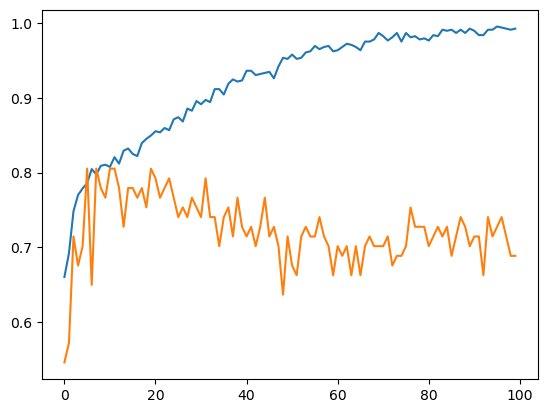

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']);

#### _Regression_ 

In [50]:
df=pd.read_pickle('kc_house.pkl')

In [51]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x=df.drop('price', axis=1)
y=df[['price']]

In [53]:
x=scaler.fit_transform(x)

In [54]:
model=Sequential()
model.add(Dense(80, activation='relu')) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(100, activation='relu')) 
model.add(Dense(80, activation='relu')) 
model.add(Dense(30, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1)) #sigmoid yok

model.compile(loss='mean_squared_error', optimizer='adam')

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

In [57]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=64, verbose=1, epochs=120)

Epoch 1/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 124861530112.0000 - val_loss: 9536075776.0000
Epoch 2/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8492191744.0000 - val_loss: 8760511488.0000
Epoch 3/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7995118592.0000 - val_loss: 8333016064.0000
Epoch 4/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7760431616.0000 - val_loss: 8241526784.0000
Epoch 5/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7601244160.0000 - val_loss: 8243496960.0000
Epoch 6/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7526014464.0000 - val_loss: 8171508736.0000
Epoch 7/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7455557120.0000 - val_loss: 8172419072.0000
Epoch 8/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7374741504.0000 - val_loss: 8003405824.0000
Epoch 9/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7287401472.0000 - val_loss: 8081942528.0000
Epoch 10/120
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [58]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   


In [59]:
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
r2_score(y_test,tahmin)

0.8433682918548584

In [62]:
mean_squared_error(y_test,tahmin)**.5

89543.76806902868

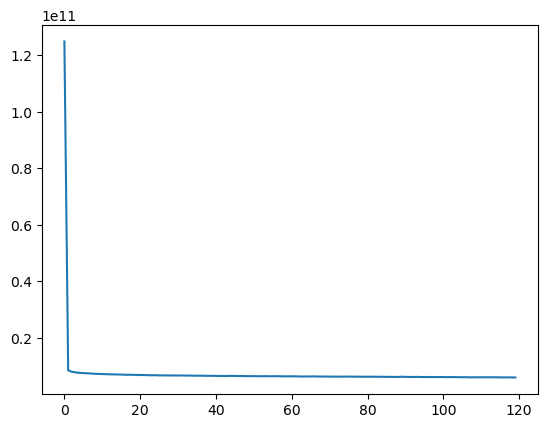

In [64]:
plt.plot(history.history['loss']);

#### _Early Stopping - Önceden Dur_

In [66]:
df=pd.read_excel('cars.xls')

In [67]:
x=df.drop('Price',axis=1)
y=df[['Price']]

In [68]:
x.head()

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [71]:
x=pd.get_dummies(x,drop_first=True)

In [73]:
x=scaler.fit_transform(x) # normalization

In [75]:
model=Sequential()
model.add(Dense(64, activation='relu')) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(256, activation='relu')) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
early_stop=EarlyStopping(monitor='val_loss', patience=10)

In [79]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=130,batch_size=32,callbacks=[early_stop],verbose=1)

Epoch 1/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 49976274944.0000 - val_loss: 9213989888.0000
Epoch 2/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8204155904.0000 - val_loss: 8737305600.0000
Epoch 3/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7883341824.0000 - val_loss: 8494246912.0000
Epoch 4/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7613939200.0000 - val_loss: 8163002368.0000
Epoch 5/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7628744192.0000 - val_loss: 8037019648.0000
Epoch 6/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7441200128.0000 - val_loss: 8056925696.0000
Epoch 7/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7397389824.0000 - val_loss: 7980560896.0000
Epoch 8/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7351659008.0000 - val_loss: 8016366592.0000
Epoch 9/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7293404672.0000 - val_loss: 7897161216.0000
Epoch 10/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 

In [80]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [81]:
r2_score(tahmin,y_test)

0.823106586933136

#### _Torch_

In [85]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [90]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
x = df.drop('Price', axis=1)
y = df[['Price']]

# One-hot encoding
x = pd.get_dummies(x, drop_first=True)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the model
class NeuralNetwork(nn.Module):
    def _init_(self):
        super(NeuralNetwork, self)._init_()
        self.fc1 = nn.Linear(x_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 1)

    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = nn.ReLU()(self.fc3(x))
        x = nn.ReLU()(self.fc4(x))
        x = nn.ReLU()(self.fc5(x))
        x = nn.ReLU()(self.fc6(x))
        return self.fc7(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training the model
num_epochs = 130
batch_size = 32

# Convert data to DataLoader for batching
train_data = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Early stopping variables
best_loss = float('inf')
patience = 10
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
    
    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

ValueError: optimizer got an empty parameter list